## Customer Demographics & Behavior Analysis

In [1]:
import numpy as np
import pandas as pd


#Plotting and viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.ticker as ticker
import plotly.express as px

In [2]:
df_train = pd.read_csv('/Users/dennis_m_jose/Documents/GitHub/Santander-RecSys-Dennis/data/cleaned_santander_data.csv')

/var/folders/jl/5_rcdjz121v7rnhqrmsz6df80000gn/T/ipykernel_36234/1706210101.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/Users/dennis_m_jose/Documents/GitHub/Santander-RecSys-Dennis/data/cleaned_santander_data.csv')


### **Customer Segmentation**

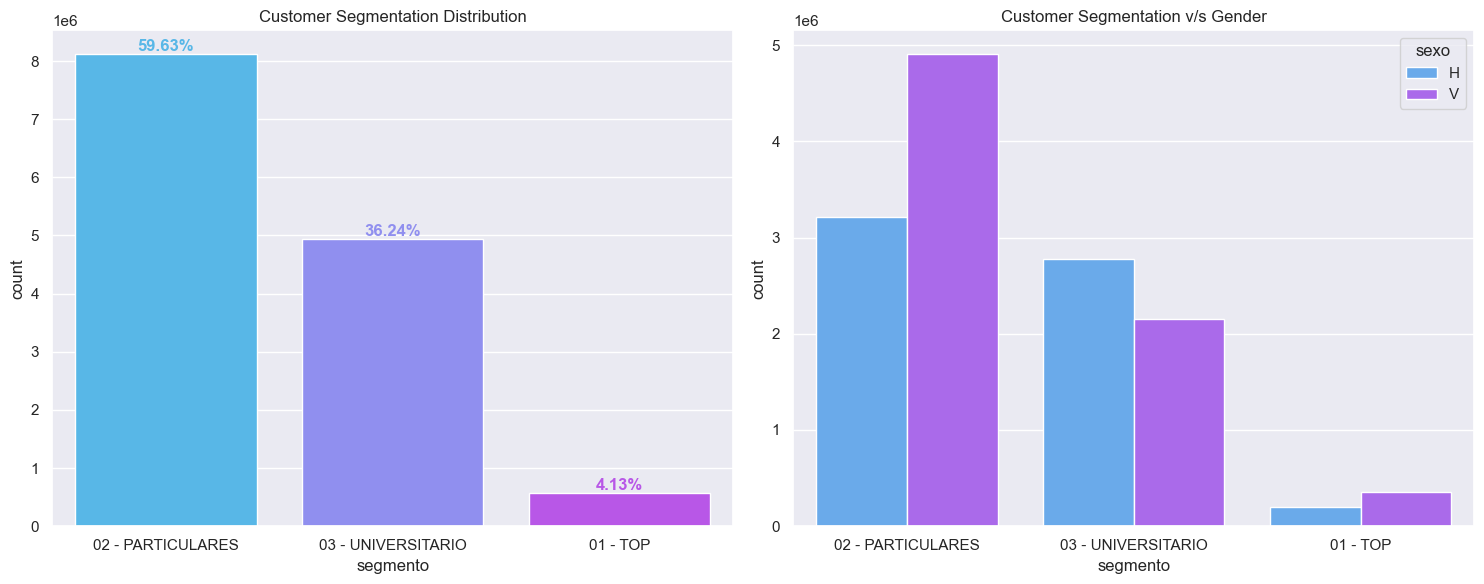

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
palette = sns.color_palette("cool", n_colors=3)


sns.countplot(x=df_train['segmento'],ax = ax[0],palette=palette)
total = len(df_train)
for bar in ax[0].patches:
    height = bar.get_height()
    percentage = f"{(height / total) * 100:.2f}%"
    ax[0].annotate(
        percentage,
        (bar.get_x() + bar.get_width() / 2, height + 1000),
        ha='center',
        va='bottom',
        fontweight='bold',
        color=bar.get_facecolor()
    )

ax[0].set_title("Customer Segmentation Distribution")
    
sns.countplot(x=df_train['segmento'],hue=df_train['sexo'],palette='cool',ax=ax[1])
ax[1].set_title('Customer Segmentation v/s Gender')
plt.tight_layout()
plt.show()

The majority of the bank's customers fall into the "Particulares" **(regular individuals) segment, accounting for 58.33%** of the total base. Student customers **("Universitario") form a significant portion as well, at 36.17%.** Only **4.12% belong to the "TOP" premium segment**, indicating a smaller high-net-worth customer base with potentially higher lifetime value.

In terms of gender distribution, 
- **women slightly outnumber men in both the regular and premium segments**, suggesting **strong female engagement with core banking services.** 
- However, in the **student segment, male customers dominate,** highlighting a potential gap in engagement among female students. 
- This suggests an opportunity for the bank to tailor products and outreach for women in early financial stages, and to expand offerings that appeal to the underrepresented groups in each segment.

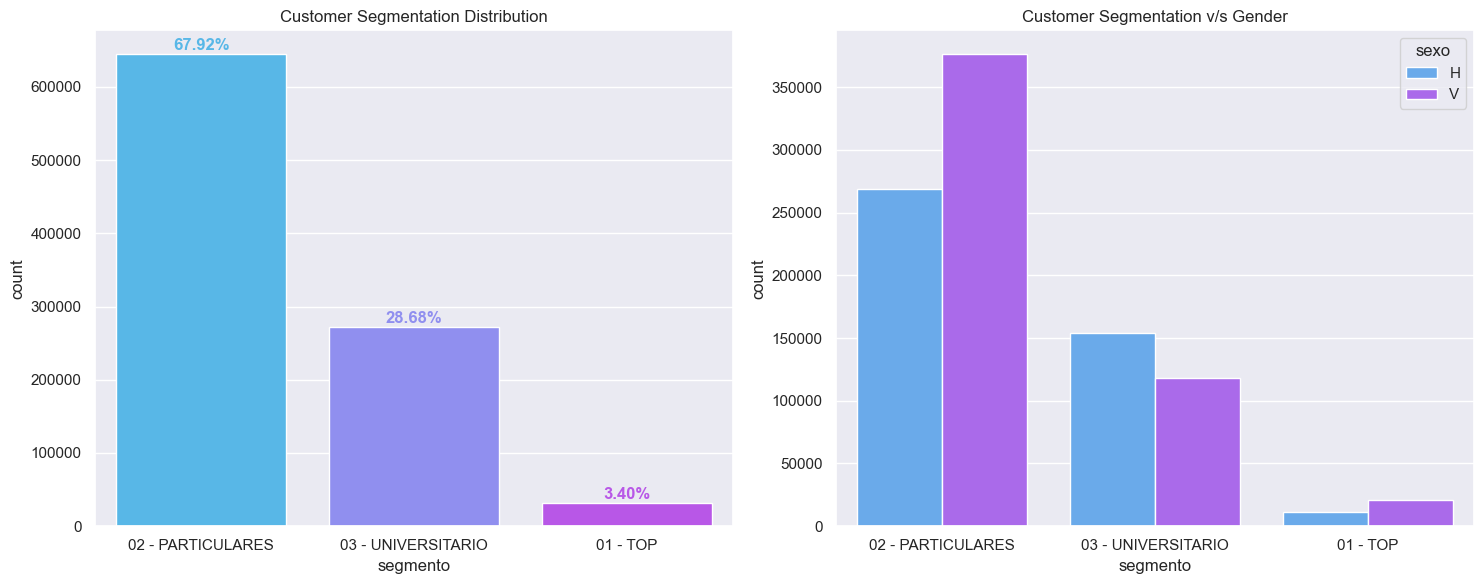

(949614, 46)


In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
palette = sns.color_palette("cool", n_colors=3)

df_train_copy = df_train.drop_duplicates(subset='ncodpers')
sns.countplot(x=df_train_copy['segmento'],ax = ax[0],palette=palette)
total = len(df_train_copy)
for bar in ax[0].patches:
    height = bar.get_height()
    percentage = f"{(height / total) * 100:.2f}%"
    ax[0].annotate(
        percentage,
        (bar.get_x() + bar.get_width() / 2, height + 1000),
        ha='center',
        va='bottom',
        fontweight='bold',
        color=bar.get_facecolor()
    )

ax[0].set_title("Customer Segmentation Distribution")
    
sns.countplot(x=df_train_copy['segmento'],hue=df_train_copy['sexo'],palette='cool',ax=ax[1])
ax[1].set_title('Customer Segmentation v/s Gender')
plt.tight_layout()
plt.show()
print(df_train_copy.shape)

### **Age, Gender, Segmento**

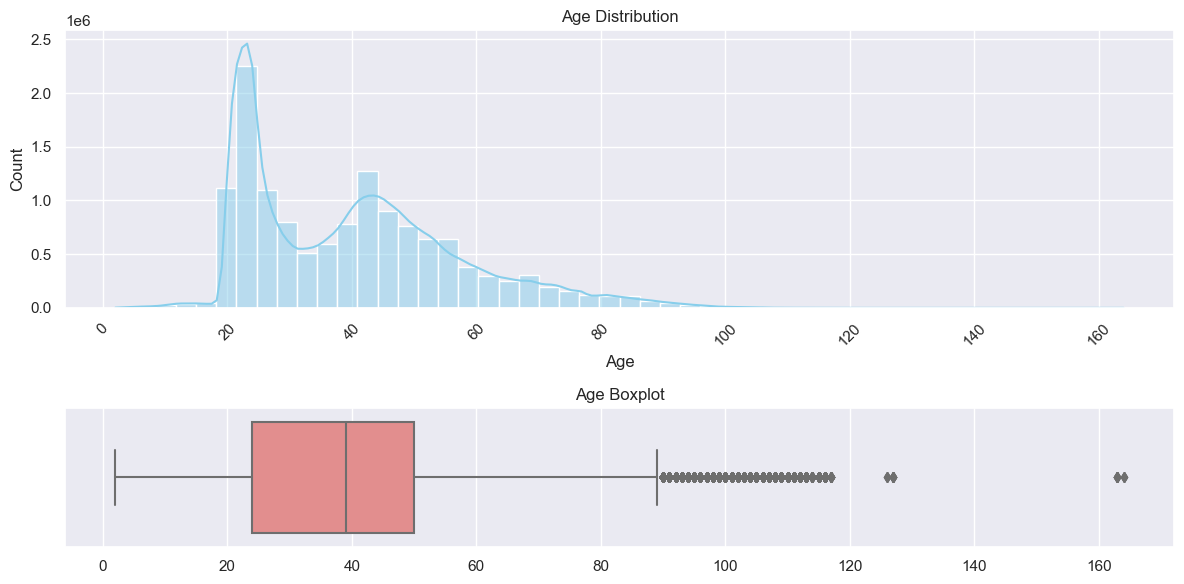

In [10]:
age_data = df_train['age']
median_age = df_train['age'].median()
age_data = age_data.fillna(median_age)
fig, axes = plt.subplots(2, 1, figsize=(12, 6),gridspec_kw={'height_ratios': [2, 1]})

sns.histplot(age_data, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x=age_data, ax=axes[1], color='lightcoral')
axes[1].set(xlabel=None)
axes[1].set_title('Age Boxplot')

plt.tight_layout()
plt.show()

**Age Distribution (Top Plot)**

The histogram shows that the majority of customers are between 20 and 50 years old, with a noticeable spike around age 23. This spike could be due to a large group of young adults, possibly student accounts or individuals who recently entered the workforce.

There is a gradual decline in the number of customers as age increases beyond 50, which is expected in a general banking population. However, there are outliers on the far right — individuals listed as over 100 years old, and even beyond 120 and 160. These are likely data entry errors and should be reviewed during data cleaning.

**Boxplot (Bottom Plot)**
- The boxplot confirms the insights from the histogram:

- The median age lies around the mid-30s.

- The interquartile range (IQR) spans from about age 23 to age 53.

- Numerous data points beyond 90 are considered statistical outliers.

- Extreme values above 120, like 130 or 160, are almost certainly incorrect and should be excluded from analysis.

In [11]:
age_greaterThan_100 = df_train[df_train['age'] > 100]
print(f"Total Values above 100 {age_greaterThan_100 ['age'].count()}")
age_greaterThan_100['age'].value_counts()

Total Values above 100 12869


101.0    2666
102.0    2335
103.0    2003
104.0    1350
105.0    1280
106.0     899
107.0     594
108.0     456
109.0     265
110.0     261
111.0     252
112.0     188
113.0     117
115.0      82
116.0      63
114.0      22
117.0      14
163.0       8
127.0       8
126.0       3
164.0       3
Name: age, dtype: int64

In [12]:
df_train['age'].median()

39.0

In [13]:
df_train['age'].mean()

40.18141341033942

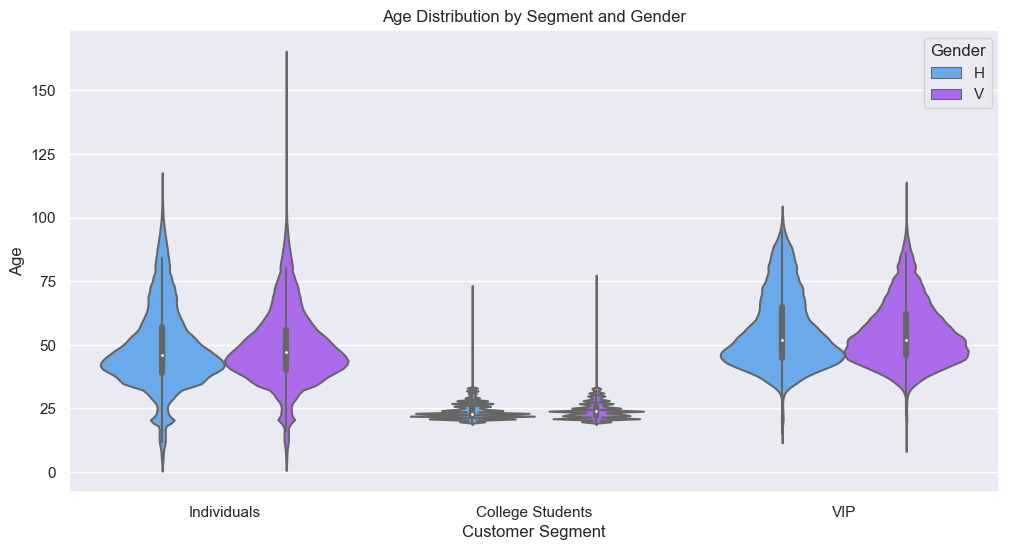

In [14]:
segment_labels = {
    '01 - TOP': 'VIP',
    '02 - PARTICULARES': 'Individuals',
    '03 - UNIVERSITARIO': 'College Students'
}

#df_train['age'] = pd.to_numeric(df_train['age'], errors='coerce')
df_viz = df_train.dropna(subset=['age', 'segmento', 'sexo']).copy()
df_viz.loc[:, 'segmento'] = df_viz['segmento'].replace(segment_labels)

plt.figure(figsize=(12,6))
sns.violinplot(x='segmento', y='age', hue='sexo', data=df_viz, inner='box', palette='cool')
plt.title('Age Distribution by Segment and Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

In [15]:
print(df_viz.shape)
print(df_train.shape)

(13619357, 46)
(13619357, 46)


This violin plot shows the age distribution of bank customers across three different customer segments — **Individuals, College Students, and VIPs** — and also compares how age varies between males (H) and females (V) within each group.

- College Students are mostly aged between 18 and 30, with a sharp concentration around the early 20s.

- Individuals and VIPs have a much wider age range, stretching from 20s to 90s and even beyond 100 in some cases.

- The distributions are fairly similar between genders, although females (V) in the Individual and VIP groups show a slightly broader spread in older ages.



### **Income distribution**

In [3]:
df_train['renta'].describe()

count    1.361936e+07
mean     1.275019e+05
std      2.063702e+05
min      1.202730e+03
25%      7.636515e+04
50%      1.053534e+05
75%      1.396445e+05
max      2.889440e+07
Name: renta, dtype: float64

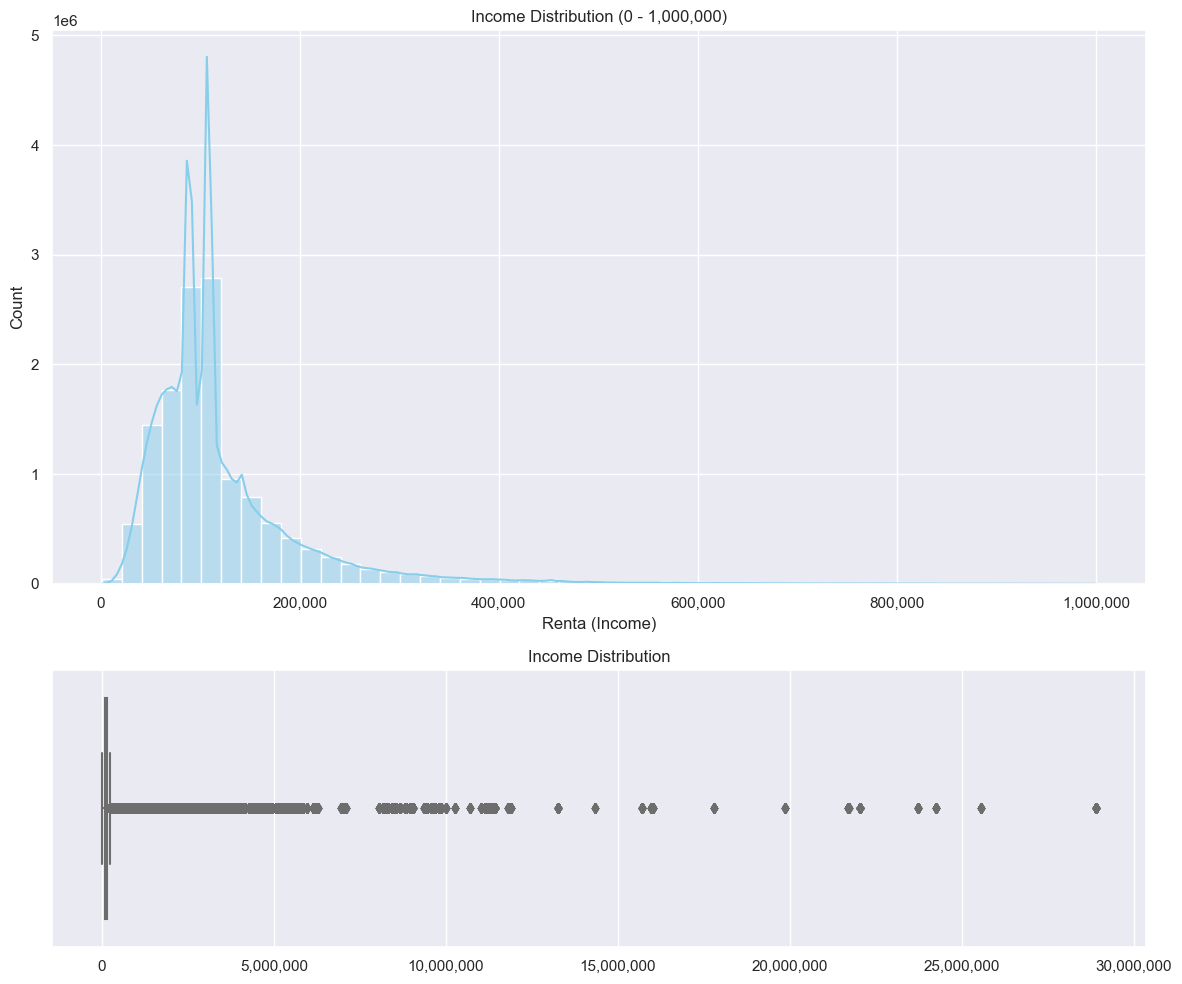

In [4]:
df_train['renta'] = pd.to_numeric(df_train['renta'], errors='coerce')
df_renta = df_train['renta'].dropna()
df_renta_clean = df_renta[(df_renta > 0) & (df_renta < 1_000_000)]

fig, ax = plt.subplots(2,1, figsize=(12,10),gridspec_kw={'height_ratios':[2,1]})

sns.histplot(df_renta_clean, bins=50, kde=True, color='skyblue',ax = ax[0])
ax[0].set_title('Income Distribution (0 - 1,000,000)')
ax[0].set_xlabel('Renta (Income)')
ax[0].set_ylabel('Count')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.boxplot(x=df_renta, ax = ax[1],color = 'salmon')
ax[1].set_title('Income Distribution')
ax[1].set(xlabel = None)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


The vast majority of incomes fall below 200,000.

There are multiple peaks, suggesting the presence of income bands or clusters (perhaps due to different customer segments or reporting thresholds).

The plot is right-skewed: a long tail extends to higher income values, indicating a few customers with extremely high income.

The wide presence of outliers indicates a need to either:

- Use log transformation or robust scaling for modeling tasks

- Or perform separate analysis for general and high-income groups

Marketing, segmentation, and model building should consider this skewed nature to avoid bias toward outliers.

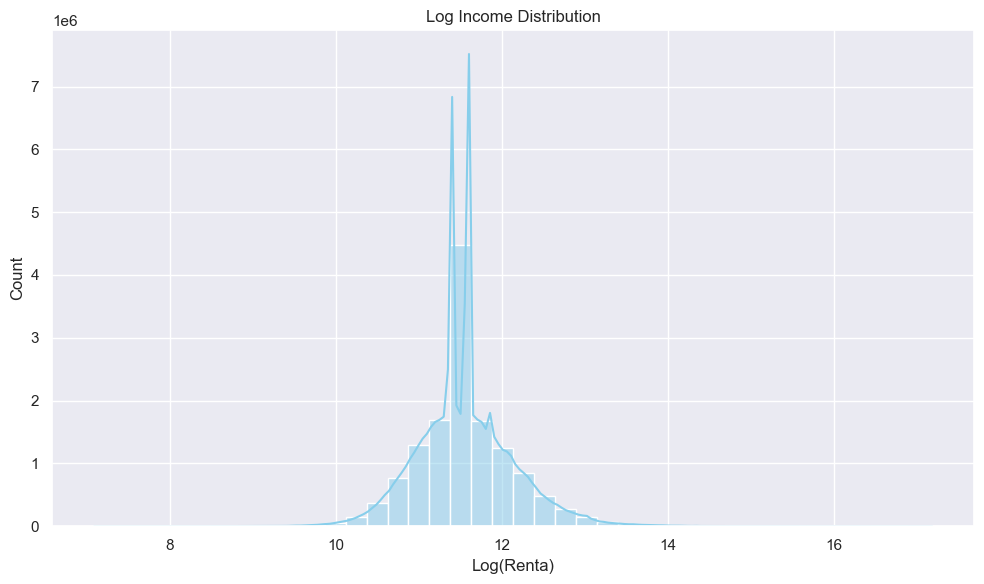

In [6]:
import numpy as np
df_renta_log = np.log1p(df_renta[df_renta > 0])

plt.figure(figsize=(10,6))
sns.histplot(df_renta_log, bins=40, kde=True, color='skyblue')
plt.title('Log Income Distribution')
plt.xlabel('Log(Renta)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [7]:
segment_labels = {
    '01 - TOP': 'VIP',
    '02 - PARTICULARES': 'Individuals',
    '03 - UNIVERSITARIO': 'College Students'
}

In [8]:
df_income_viz = df_train.dropna(subset=['renta', 'segmento', 'sexo']).copy()

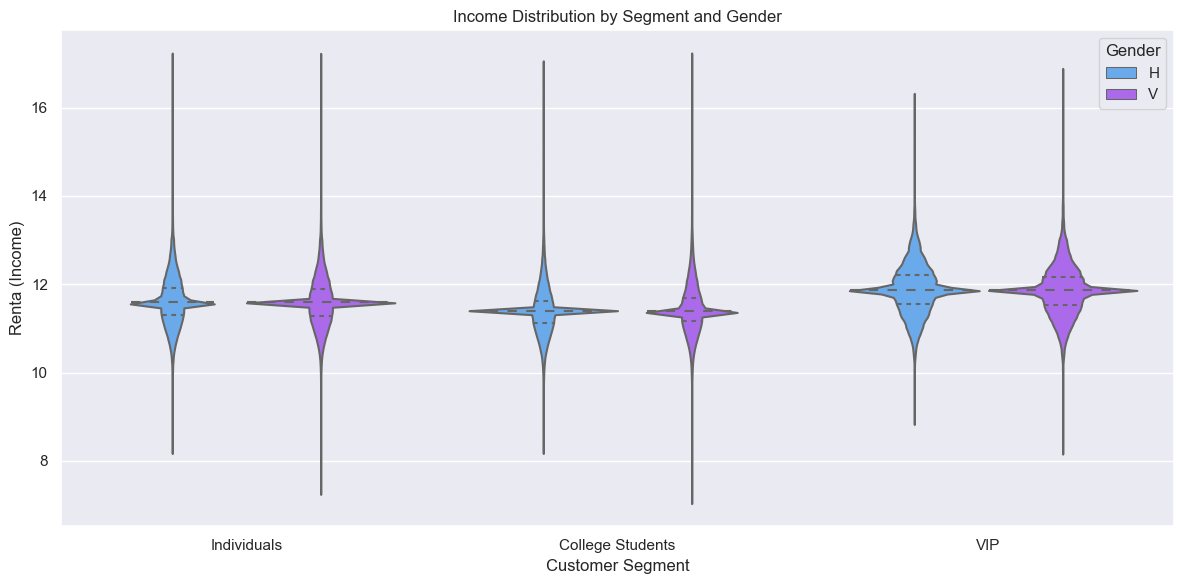

In [9]:
df_income_viz.loc[:, 'segmento'] = df_income_viz['segmento'].replace(segment_labels)

plt.figure(figsize=(12,6))
df_income_viz['log_renta'] = np.log1p(df_income_viz['renta'])
sns.violinplot(x='segmento', y='log_renta', hue='sexo', data=df_income_viz, inner='quartile', palette='cool')
plt.title('Income Distribution by Segment and Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Renta (Income)')
plt.legend(title='Gender')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()

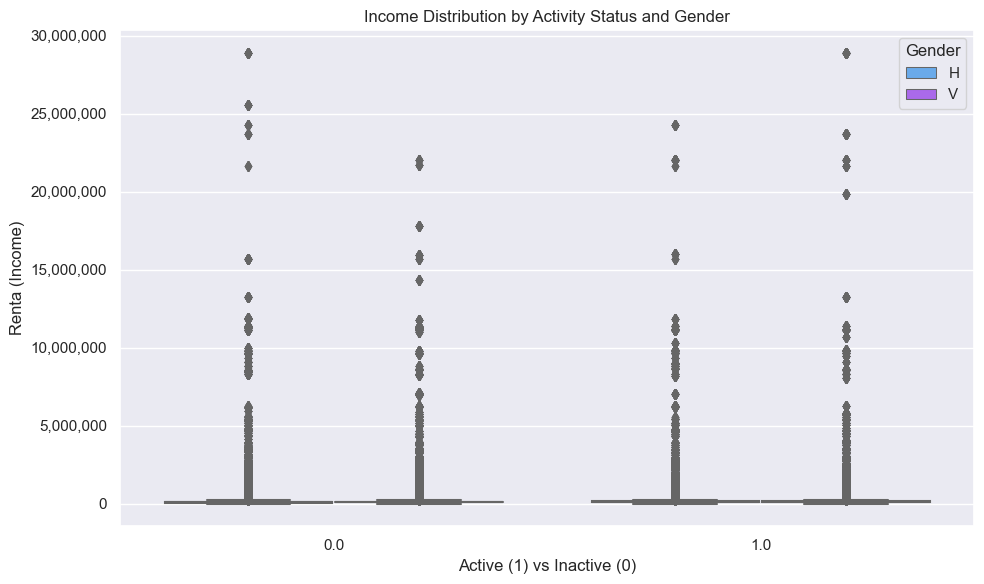

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ind_actividad_cliente', y='renta', hue='sexo', data=df_income_viz, palette='cool')
plt.title('Income Distribution by Activity Status and Gender')
plt.xlabel('Active (1) vs Inactive (0)')
plt.ylabel('Renta (Income)')
plt.legend(title='Gender')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


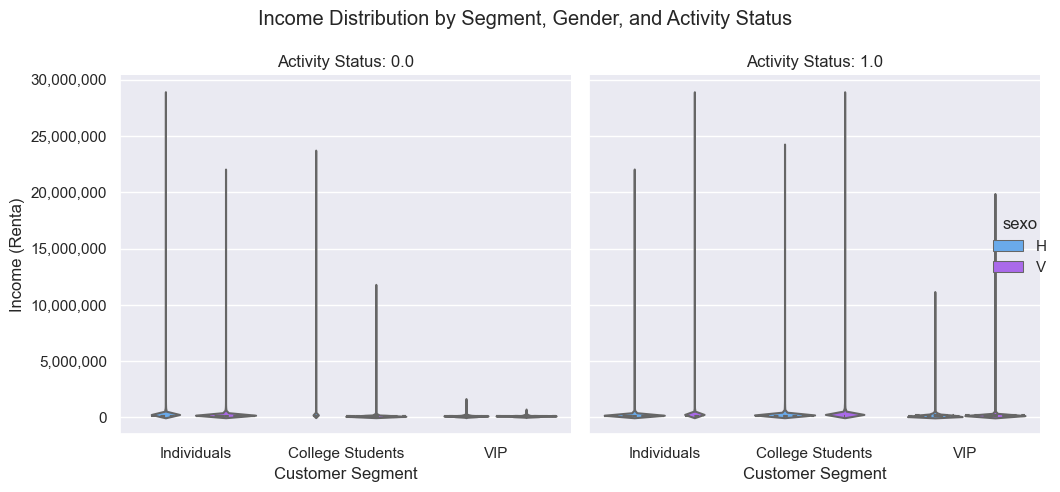

In [11]:
g = sns.catplot(
    data=df_income_viz,
    x='segmento', y='renta', hue='sexo',
    col='ind_actividad_cliente',
    kind='violin',
    palette='cool', inner='quartile'
)

g.set_titles("Activity Status: {col_name}")
g.set_axis_labels("Customer Segment", "Income (Renta)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Income Distribution by Segment, Gender, and Activity Status")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


This chart compares the income distribution of different customer segments based on gender and their activity status (active vs inactive).

- VIPs consistently have the highest income, regardless of activity status.

- College Students have the lowest income, showing a narrow and lower range across the board.

- Females (V) and Males (H) show similar income distributions within each group.

- Active customers (Activity Status: 1.0) tend to have slightly higher median incomes and more uniform distributions compared to inactive ones.

This suggests income is a relevant factor in customer engagement. Higher-income individuals are more likely to remain active.

### **Segment-wise product ownership patterns**

In [12]:
#Product Labels Mapped from Kaggle Documentation of Data
product_labels = {
    'ind_ahor_fin_ult1': 'Saving Account',
    'ind_aval_fin_ult1': 'Guarantees',
    'ind_cco_fin_ult1': 'Current Accounts',
    'ind_cder_fin_ult1': 'Derivada Account',
    'ind_cno_fin_ult1': 'Payroll Account',
    'ind_ctju_fin_ult1': 'Junior Account',
    'ind_ctma_fin_ult1': 'Más particular Account',
    'ind_ctop_fin_ult1': 'Particular Account',
    'ind_ctpp_fin_ult1': 'Particular Plus Account',
    'ind_deco_fin_ult1': 'Short-term Deposits',
    'ind_deme_fin_ult1': 'Medium-term Deposits',
    'ind_dela_fin_ult1': 'Long-term Deposits',
    'ind_ecue_fin_ult1': 'e-Account',
    'ind_fond_fin_ult1': 'Funds',
    'ind_hip_fin_ult1': 'Mortgage',
    'ind_plan_fin_ult1': 'Pensions',
    'ind_pres_fin_ult1': 'Loans',
    'ind_reca_fin_ult1': 'Taxes',
    'ind_tjcr_fin_ult1': 'Credit Card',
    'ind_valo_fin_ult1': 'Securities',
    'ind_viv_fin_ult1': 'Home Account',
    'ind_nomina_ult1': 'Payroll',
    'ind_nom_pens_ult1': 'Pension Income',
    'ind_recibo_ult1': 'Direct Debit'
}

In [13]:
# Which products are most/least popular overall
ult1_columns = [col for col in df_train.columns if col.endswith('ult1')]

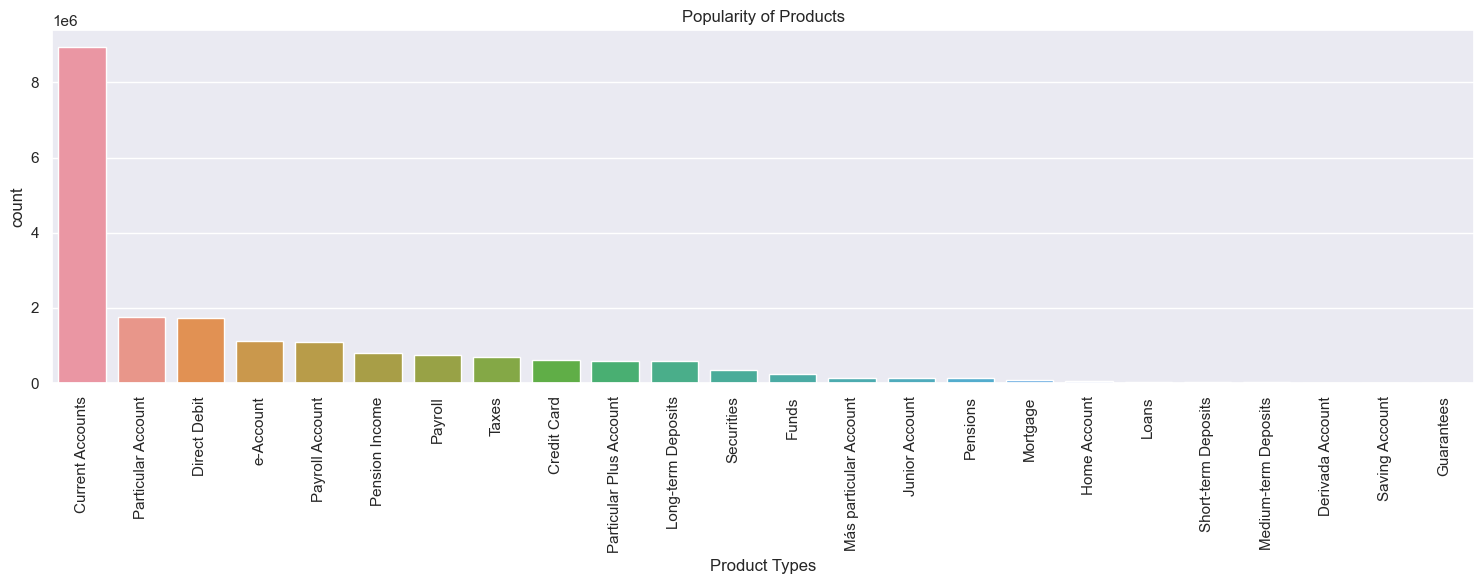

In [14]:
product_count = {}
for col in ult1_columns:
    sum_of_values = df_train[col].sum()
    product_count[col] = sum_of_values

product_df = pd.DataFrame(
    list(product_count.items()), 
    columns=['product', 'count']
)

product_df['product_name'] = product_df['product'].map(product_labels)
product_df.sort_values(by='count', ascending=False, inplace=True)

plt.figure(figsize=(15,6))
sns.barplot(x=product_df['product_name'], y = product_df['count'])
plt.title("Popularity of Products")
plt.xlabel("Product Types")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


In [15]:
import plotly.express as px

df_product_segment_relation = df_train.groupby('segmento')[ult1_columns].sum()

df_melted = df_product_segment_relation.reset_index().melt(
    id_vars='segmento',
    var_name='product',
    value_name='ownership_rate'
)
df_melted['product_name'] = df_melted['product'].map(product_labels)

px.bar(df_melted, x='product_name',
       y = 'ownership_rate',
       color='segmento',
       title='Customer Segment w.r.t products owned',
       labels={
        "segmento": "Segment",
        "product_name" : "Product Name",
        "ownership_rate": "Ownership Rate (%)"
    }
       )



This chart shows how different types of customers own various banking products.

- Current Accounts are by far the most owned product, especially among regular individuals (PARTICULARES) and students (UNIVERSITARIO).

- Direct Debit, Pension Income, and Payroll products are the next most commonly held.

- The 'TOP' customers own fewer products overall but still appear in premium product categories like Long-term Deposits, Credit Cards, and e-Accounts.

- Students mostly use basic services like Current Accounts, Junior Accounts, and e-Accounts.

- Regular Individuals dominate across most product categories, showing they form the bank's core customer base.

***The plot is saved is `data/plots`***

In [16]:
df_train['ncodpers'].nunique() - df_train[df_train['ind_cco_fin_ult1'] == 1]['ncodpers'].nunique()

329962

In [17]:
import plotly.express as px


df_train = df_train.dropna(subset = 'ind_actividad_cliente')
df_train['ind_actividad_cliente'] = df_train['ind_actividad_cliente'].astype(int)
df_product_segment_relation2 = df_train.groupby(['segmento','ind_actividad_cliente'])[ult1_columns].mean()


df_melted2 = df_product_segment_relation2.reset_index().melt(
    id_vars=['segmento','ind_actividad_cliente'],
    var_name='product',
    value_name='ownership_rate'
)
df_melted2['product'] = df_melted2['product'].map(product_labels)

fig = px.bar(
    df_melted2, 
    x='product', 
    y='ownership_rate', 
    color='ind_actividad_cliente',
    barmode='group',
    facet_col='segmento',
    title='Product Usage: Active vs Inactive Customers',
    labels={
        'product': 'Product',
        'count': 'Number of Customers',
        'ind_actividad_cliente': 'Customer Status',
        'ownership_rate':'Ownership Rate (%)'
    },
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()



### **Time-based dynamics**

In [18]:
df_train['fecha_alta'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13619357 entries, 0 to 13619356
Series name: fecha_alta
Non-Null Count     Dtype 
--------------     ----- 
13619357 non-null  object
dtypes: object(1)
memory usage: 103.9+ MB


In [19]:
#Convert the fecha alta to datetime format
df_train['fecha_alta'] = pd.to_datetime(df_train['fecha_alta'])

#Extract Year and Month
df_train['year'] = df_train['fecha_alta'].dt.year
df_train['month'] = df_train['fecha_alta'].dt.month

#Generate a dataframe for unique customers
df_unique_customers = df_train.drop_duplicates(subset='ncodpers')
monthly_unique_customers = (
    df_unique_customers
    .groupby(['year','month', 'segmento'])
    .size()
    .reset_index(name='num_new_customers')
)

# Month Year column on unique customers
monthly_unique_customers['month_year'] = pd.to_datetime(
    monthly_unique_customers[['year', 'month']].assign(day=1)
)

#Plot the line
fig = px.line(
    monthly_unique_customers,
    x = 'month_year',
    y = 'num_new_customers',
    color = 'segmento',
    markers = True,
    title='Monthly Customer Acquisition',
    labels={
        'num_new_customers':'Number of new Customers',
        'month_year':'Time'
    } 
)
fig.update_layout(
    legend_title='Segment',
    font=dict(size=10),
    template='plotly_white'
)
fig.show()


**Monthly Customer Acquisition by Segment**

- **TOP Clients (01):** Show a steady but low volume of acquisitions over time, rarely exceeding 400 new customers/month.

- **PARTICULARES (02):** This is the dominant segment, with acquisition peaking around March 2001 (approx. 4000+ new customers/month). Growth was consistent until 2005, followed by slight fluctuations and a drop post-2015.

- **UNIVERSITARIO (03):** Students show a sharp, high-spike pattern between 2011 and 2015, with many months crossing 10k+ customers, possibly due to targeted onboarding campaigns.

Each segment shows a unique growth pattern, with the bank gaining the most customers in the PARTICULARES and UNIVERSITARIO segments.

***Go to `data/plots/{segment}Aquisiton.png` to view the plot***

### **Trend of monthly new product additions for the top 10 most-added products in the Santander dataset from early 2015 to mid-2016**

In [20]:
df_train['fecha_dato'] = pd.to_datetime(df_train['fecha_dato'])

In [21]:
#Preparing Data for viz
df_train_copy = df_train.sort_values(['ncodpers', 'fecha_dato'])
cols_to_use = ['ncodpers', 'fecha_dato'] + ult1_columns
df_small = df_train[cols_to_use].copy()


for col in ult1_columns:
    df_small[col] = df_small[col].fillna(0).astype('int8')

df_small.sort_values(['ncodpers', 'fecha_dato'], inplace=True)


product_cols = ult1_columns
product_diff = pd.DataFrame(0, index=df_small.index, columns=product_cols)

#Processing in batches to avoid kernel crash
unique_ids = df_small['ncodpers'].unique()
batch_size = 100000

for i in range(0, len(unique_ids), batch_size):
    batch_ids = unique_ids[i:i + batch_size]
    batch_df = df_small[df_small['ncodpers'].isin(batch_ids)].copy()

    # Shift previous month’s values
    shifted = batch_df.groupby('ncodpers')[product_cols].shift(1).fillna(0).astype('int8')
    
    # Only count additions: where previous = 0 and current = 1
    additions = ((batch_df[product_cols] - shifted) == 1).astype('int8')
    
    # Assign to product_diff
    product_diff.loc[batch_df.index] = additions


product_diff['fecha_dato'] = df_small['fecha_dato']

product_totals = product_diff[product_cols].sum().sort_values(ascending=False)
top_10 = product_totals.head(10).index.tolist()

df_long = product_diff[top_10 + ['fecha_dato']].melt(
    id_vars='fecha_dato', var_name='product', value_name='added'
)

monthly_trend = df_long.groupby(['fecha_dato', 'product'])['added'].sum().reset_index()
monthly_trend = monthly_trend[monthly_trend['fecha_dato'] > '2015-01-28']


In [22]:
#Plot using Plotly
fig = px.line(
    monthly_trend,
    x='fecha_dato',
    y='added',
    color='product',
    markers=True,
    title='Monthly New Product Additions (Top 10)',
    labels={
        'fecha_dato': 'Date',
        'added': 'New Product Additions',
        'product': 'Product'
    }
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='New Product Additions',
    legend_title='Product',
    template='plotly_white',
    width=800,
    height=400
)

fig.show()

This chart tracks the number of **new additions per month** for the top 10 financial products between January 2015 and mid-2016.

**Monthly New Product Additions (Top 10 Products)**

- The most frequently added product is ind_recibo_ult1 (Bill Payment), consistently peaking around 10,000–12,000 additions per month.

- ind_nomina_ult1' (Salary Deposit) and ind_nom_pens_ult1 (Pension Deposit) show sharp spikes, particularly around **March–April 2016**.

- Most other products have relatively flat trends with small fluctuations.

- Overall, the chart indicates bill payments, salary/pension deposits, and card services were the top products newly added each month.

***visit `data/plots/MonthlyNewCustomerAquisition.png` to view the plot***


### **Geo-Demographic Analysis**

In [23]:
# Ensure 'ncodpers', 'cod_prov', 'nomprov' are in your dataframe
province_customers = df_train[['ncodpers', 'cod_prov', 'nomprov']].drop_duplicates()

# Count customers by province
province_counts = province_customers.groupby(['cod_prov', 'nomprov']).size().reset_index(name='customer_count')

# Sort by customer count
province_counts = province_counts.sort_values('customer_count', ascending=False)


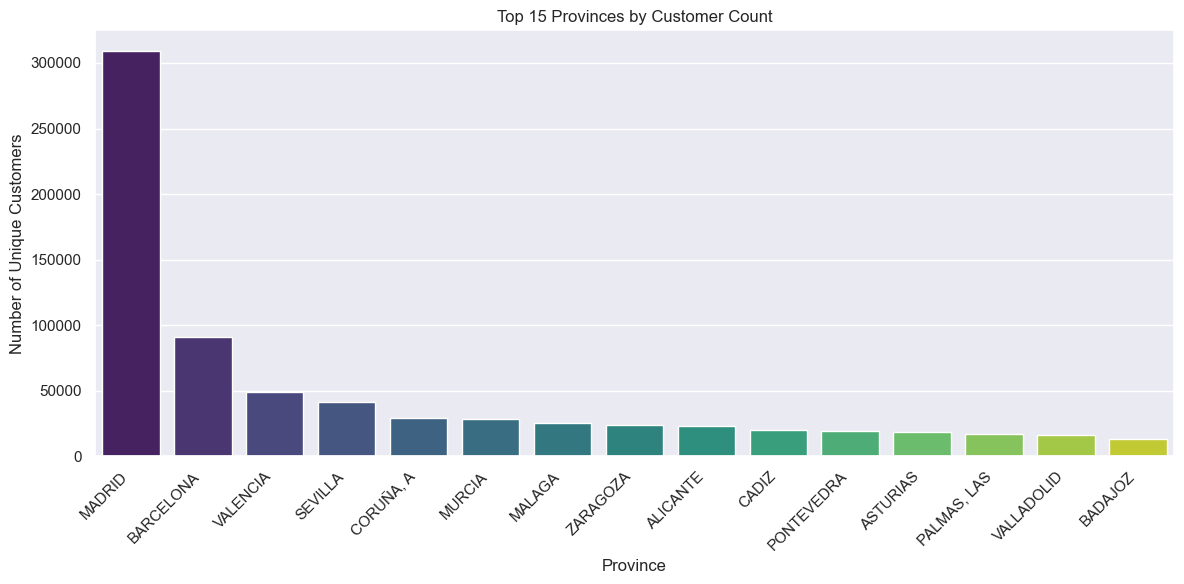

In [24]:
# Plot top 15 provinces
plt.figure(figsize=(12, 6))
sns.barplot(
    data=province_counts.head(15),
    x='nomprov',
    y='customer_count',
    palette='viridis'
)
plt.title('Top 15 Provinces by Customer Count')
plt.xlabel('Province')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Top 15 Provinces by Customer Count**

- **Madrid** has the highest number of customers by far, with over 300,000.

- **Barcelona** follows, but with a significantly smaller count (~90,000).

- Other provinces like Valencia, Sevilla, and A Coruña also contribute, but each has less than 50,000 customers.

- The customer base is highly concentrated in a few major urban areas.


In [25]:
product_to_plot =  [col for col in df_train.columns if col.endswith('ult1')]

In [26]:
len(product_to_plot)

24

In [27]:
# Create subplot grid (12 rows × 2 columns)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
rows, cols = 8, 3
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"{p}" for p in product_to_plot])

# Plot each product in a subplot
for idx, product in enumerate(product_to_plot):
    top_prov = df_train.groupby('nomprov')[product].sum().sort_values(ascending=False).head(10)

    row = (idx // cols) + 1
    col = (idx % cols) + 1

    fig.add_trace(
        go.Bar(x=top_prov.index, y=top_prov.values, name=product),
        row=row, col=col
    )

    fig.update_xaxes(tickangle=45, row=row, col=col)

# Update layout
fig.update_layout(
    height=1800,
    width=800,
    showlegend=False,
    title_text="Average Ownership Rate by Province (Top 10 per Product)",
    title_x=0.5
)

fig.show()

In [3]:

product_cols = [col for col in df_train.columns if col.endswith('ult1')]

# Melt the DataFrame to long format
df_long = df_train.melt(id_vars='nomprov', value_vars=product_cols,
                        var_name='product', value_name='ownership')

# Filter only the owned products (value == 1)
df_owned = df_long[df_long['ownership'] == 1]

# Group by province and product to get total ownership
ownership_by_region = (
    df_owned
    .groupby(['nomprov', 'product'])
    .size()
    .reset_index(name='count')
)


# Plot treemap
fig = px.treemap(
    ownership_by_region,
    path=['nomprov', 'product'],
    values='count',
    title='Product Ownership by Province (Treemap)',
    color='count',
    color_continuous_scale='Viridis'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


**Product Ownership by Province**

- **Madrid** dominates product ownership, especially for the product `ind_cco_fin_ult1`.

- Other large rectangles like `ind_ctop_fin_ult1` and `ind_recibo_ult1` also appear within Madrid.

- **Barcelona**, **Valencia**, and **Coruña** also have significant product ownership but on a smaller scale.

- The largest space in each province is occupied by `ind_cco_fin_ult1`, showing it's the most commonly held product across all regions.

***Visit the `data/plots/AverageOwnershipbyProvince.png` to view the plot***
